In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__
seaborn.set_context(context='talk', font_scale=1.2)

In [3]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [4]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.

Procedemos a repasar rapidamente la informacion estadistica de las variables de interes para entender las proporciones de los cuartiles y poder decidir que limites de intervalos considerar al momento de convertir las variables a categoricas:

In [5]:
pf_identity_LA = dataset[dataset.region == 'Latin America & the Caribbean'].pf_identity.describe()  
pf_identity_mundo = dataset.pf_identity.describe()  
hf_score_LA = dataset[dataset.region == 'Latin America & the Caribbean'].pf_identity.describe()  
hf_score_mundo = dataset.pf_identity.describe()  

compara1 = pandas.concat([pf_identity_mundo, pf_identity_LA], axis=1,keys=["Mundo", 'América Latina y el Caribe'], names = "pf_identity")
compara2 = pandas.concat([hf_score_mundo, hf_score_LA], axis=1,keys=["Mundo", 'América Latina y el Caribe'], names = "hf_score")
display(compara1,compara2)


pf_identity,Mundo,América Latina y el Caribe
count,1540.000000,258.000000
mean,7.280649,8.582171
std,3.181577,1.875832
min,0.000000,4.200000
25%,5.000000,6.850000
50%,8.800000,10.000000
75%,10.000000,10.000000
max,10.000000,10.000000


hf_score,Mundo,América Latina y el Caribe
count,1540.000000,258.000000
mean,7.280649,8.582171
std,3.181577,1.875832
min,0.000000,4.200000
25%,5.000000,6.850000
50%,8.800000,10.000000
75%,10.000000,10.000000
max,10.000000,10.000000


Consecuentemente, pasamos a crear las variables categoricas creando intervalos considerando los datos estadisticos obtenidos para obtener una densidad de puntos coherente entre los intervalos.

In [6]:
#Variable pf_identity
PFI_mundo = dataset.pf_identity[~dataset.pf_identity.isnull()]
i1 = PFI_mundo.min()
i2 = PFI_mundo.mean() - 0.25 * PFI_mundo.std()
i3 = PFI_mundo.mean() + 0.85 * PFI_mundo.std()
i4 = PFI_mundo.max()
intervals = [i1 , i2, i3, i4]
PFI_mundo_segment = pandas.cut(PFI_mundo, bins = intervals, labels = ["low", "medium", "high"])
exp1 = pandas.crosstab(PFI_mundo, PFI_mundo_segment)
print('\npf_identity Categorica Global\n')
display(exp1)
PFI_LA = dataset[dataset.region == 'Latin America & the Caribbean'].pf_identity
PFI_LA = PFI_LA[~PFI_LA.isnull()]
i1 = PFI_LA.min()
i2 = PFI_LA.mean() - 0.75 * PFI_LA.std()
i3 = PFI_LA.mean() + 0.75 * PFI_LA.std()
i4 = PFI_LA.max()
intervals = [i1 , i2, i3, i4]
PFI_LA_segment = pandas.cut(PFI_LA, bins = intervals, labels = ["low", "medium", "high"])
exp2 = pandas.crosstab(PFI_LA, PFI_LA_segment)
print('\npf_identity Categorica Latino America y el Caribe\n')
display(exp2)


pf_identity Categorica Global



pf_identity,low,medium,high
pf_identity,,,
low,435,0,0
medium,0,387,0
high,0,0,618



pf_identity Categorica Latino America y el Caribe



pf_identity,low,medium,high
pf_identity,,,
low,63,0,0
medium,0,45,0
high,0,0,148


In [7]:
#Variable ef_score
EFS_mundo = dataset.ef_score[~dataset.ef_score.isnull()]
i1 = EFS_mundo.min()
i2 = EFS_mundo.mean() - 0.5 * EFS_mundo.std()
i3 = EFS_mundo.mean() + 0.5 * EFS_mundo.std()
i4 = EFS_mundo.max()
intervals = [i1 , i2, i3, i4]
EFS_mundo_segment = pandas.cut(EFS_mundo, bins = intervals, labels = ["low", "medium", "high"])
exp3 = pandas.crosstab(EFS_mundo, EFS_mundo_segment)
print('\nef_score Categorica Global\n')
display(exp3)
EFS_LA = dataset[dataset.region == 'Latin America & the Caribbean'].ef_score
EFS_LA = EFS_LA[~EFS_LA.isnull()]
i1 = EFS_LA.min()
i2 = EFS_LA.mean() - 0.1 * EFS_LA.std()
i3 = EFS_LA.mean() + 0.5 * EFS_LA.std()
i4 = EFS_LA.max()
intervals = [i1 , i2, i3, i4]
EFS_LA_segment = pandas.cut(EFS_LA, bins = intervals, labels = ["low", "medium", "high"])
exp4 = pandas.crosstab(EFS_LA, EFS_LA_segment)
print('\npf_identity Categorica Latino America y el Caribe\n')
display(exp4)


ef_score Categorica Global



ef_score,low,medium,high
ef_score,,,
low,448,0,0
medium,0,552,0
high,0,0,539



pf_identity Categorica Latino America y el Caribe



ef_score,low,medium,high
ef_score,,,
low,83,0,0
medium,0,94,0
high,0,0,80


In [8]:
#Variable pf_score
PFS_mundo = dataset.pf_score[~dataset.pf_score.isnull()]
i1 = PFS_mundo.min()
i2 = PFS_mundo.mean() - 0.5 * PFS_mundo.std()
i3 = PFS_mundo.mean() + 0.5 * PFS_mundo.std()
i4 = PFS_mundo.max()
intervals = [i1 , i2, i3, i4]
PFS_mundo_segment = pandas.cut(PFS_mundo, bins = intervals, labels = ["low", "medium", "high"])
exp5 = pandas.crosstab(PFS_mundo, PFS_mundo_segment)
print('\npf_score Categorica Global\n')
display(exp5)
PFS_LA = dataset[dataset.region == 'Latin America & the Caribbean'].pf_score
PFS_LA = PFS_LA[~PFS_LA.isnull()]
i1 = PFS_LA.min()
i2 = PFS_LA.mean() - 0.5 * PFS_LA.std()
i3 = PFS_LA.mean() + 0.5 * PFS_LA.std()
i4 = PFS_LA.max()
intervals = [i1 , i2, i3, i4]
PFS_LA_segment = pandas.cut(PFS_LA, bins = intervals, labels = ["low", "medium", "high"])
exp6 = pandas.crosstab(PFS_LA, PFS_LA_segment)
print('\npf_score Categorica Latino America y el Caribe\n')
display(exp6)


pf_score Categorica Global



pf_score,low,medium,high
pf_score,,,
low,501,0,0
medium,0,528,0
high,0,0,510



pf_score Categorica Latino America y el Caribe



pf_score,low,medium,high
pf_score,,,
low,87,0,0
medium,0,92,0
high,0,0,78


4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.


pf_identity,low,medium,high
ef_score,,,
low,192,96,102
medium,183,132,207
high,59,159,309


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad economica y de identidad globales\n')

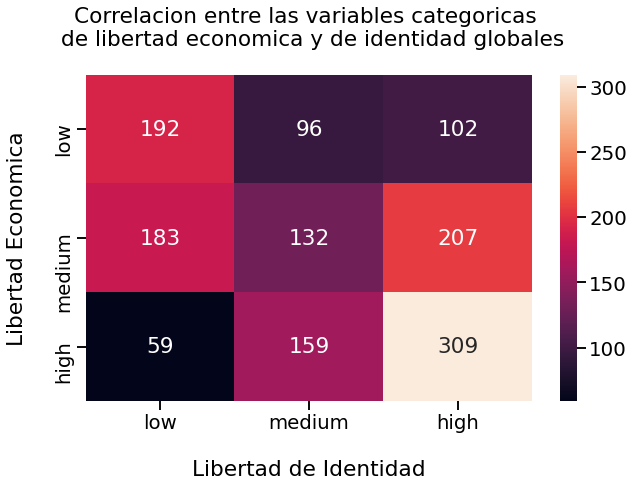

In [9]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(EFS_mundo_segment, PFI_mundo_segment)
display(exp)
seaborn.heatmap(exp, annot=True, fmt = 'd')
plt.ylabel('Libertad Economica\n')
plt.xlabel('\nLibertad de Identidad')
plt.title('Correlacion entre las variables categoricas \n de libertad economica y de identidad globales\n')

pf_identity,low,medium,high
ef_score,,,
low,24,6,53
medium,24,12,57
high,15,27,38


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad economica y de identidad de\n Latino America y el Caribe\n')

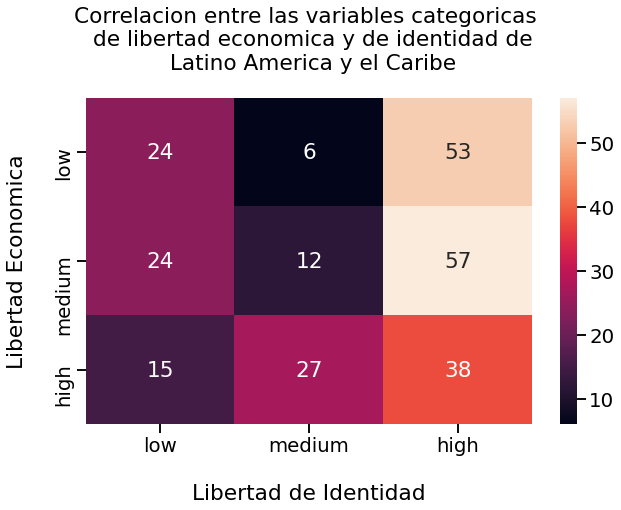

In [10]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(EFS_LA_segment, PFI_LA_segment)
display(exp)
seaborn.heatmap(exp, annot=True)
plt.ylabel('Libertad Economica\n')
plt.xlabel('\nLibertad de Identidad')
plt.title('Correlacion entre las variables categoricas \n de libertad economica y de identidad de\n Latino America y el Caribe\n')

En los graficos de arriba, podemos ver cualitativamente la correlacion entre las variables de libertad de identidad y de libertad economica. No habria una relacion aparente ya que los datos estan concentrados en el invarvalo alto de libertad de identidad aun contando con valores de libertad economica bajos

pf_identity,low,medium,high
pf_score,,,
low,294,70,38
medium,121,197,210
high,20,120,370


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad personal y de identidad globales\n')

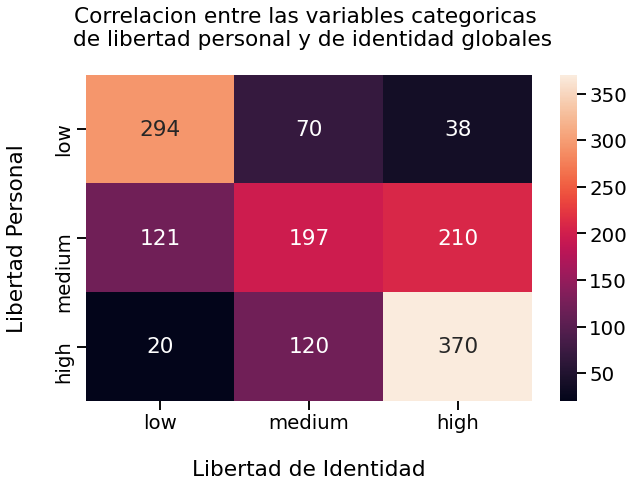

In [11]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(PFS_mundo_segment, PFI_mundo_segment)
display(exp)
seaborn.heatmap(exp, annot=True, fmt = 'd')
plt.ylabel('Libertad Personal\n')
plt.xlabel('\nLibertad de Identidad')
plt.title('Correlacion entre las variables categoricas \n de libertad personal y de identidad globales\n')

pf_identity,low,medium,high
pf_score,,,
low,36,10,41
medium,13,23,55
high,14,12,52


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad personal y de identidad de\n Latino America y el Caribe\n')

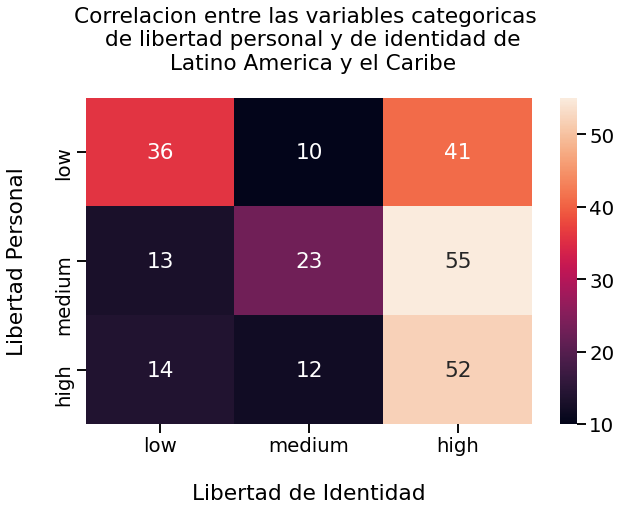

In [12]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(PFS_LA_segment, PFI_LA_segment)
display(exp)
seaborn.heatmap(exp, annot=True)
plt.ylabel('Libertad Personal\n')
plt.xlabel('\nLibertad de Identidad')
plt.title('Correlacion entre las variables categoricas \n de libertad personal y de identidad de\n Latino America y el Caribe\n')

En este grafico, para ambos casos "global" y "latinoamerica", si podemos observar cierta relacion entre las variables de libertad de identidad y libertad personal ya que los datos estan concentrados en las diagonales. Lo que sugiere que un valor alto de libertad de identidad conlleva a un valor alto de libertad personal (proporcionalidad directa)

ef_score,low,medium,high
pf_score,,,
low,286,166,48
medium,147,283,98
high,14,103,393


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad personal y economica globales\n')

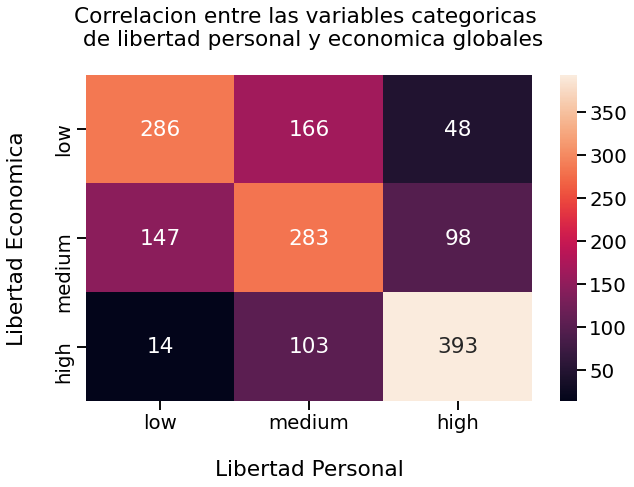

In [13]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(PFS_mundo_segment, EFS_mundo_segment)
display(exp)
seaborn.heatmap(exp, annot=True, fmt ='d')
plt.xlabel('\nLibertad Personal')
plt.ylabel('Libertad Economica\n')
plt.title('Correlacion entre las variables categoricas \n de libertad personal y economica globales\n')

ef_score,low,medium,high
pf_score,,,
low,26,45,16
medium,35,36,21
high,22,13,43


Text(0.5, 1.0, 'Correlacion entre las variables categoricas \n de libertad personal y economica de\n Latino America y el Caribe\n')

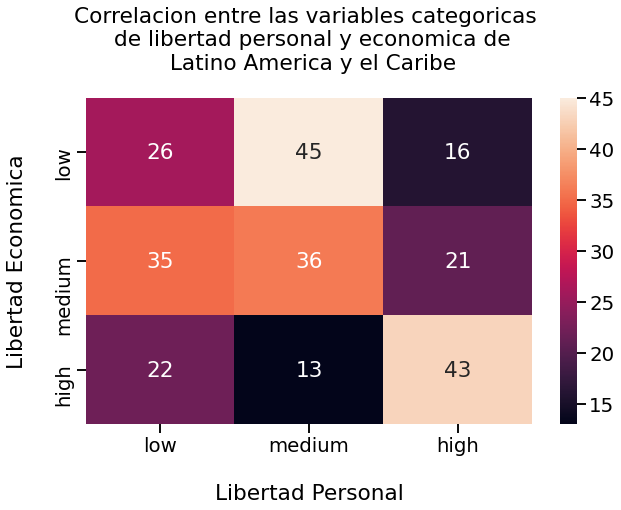

In [14]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(PFS_LA_segment, EFS_LA_segment)
display(exp)
seaborn.heatmap(exp, annot=True)
plt.xlabel('\nLibertad Personal')
plt.ylabel('Libertad Economica\n')
plt.title('Correlacion entre las variables categoricas \n de libertad personal y economica de\n Latino America y el Caribe\n')

En este ultimo grafico, se puede ver que hay pocos valores de intervalo alto de libertad personal para valores de intervalo bajo de libertad economica, y ademas hay concentracion de datos de intervalo alto en libertad personal correspondiente a intervalo tambien alto de libertad economica lo cual indicaria una cierta correlacion entre las variables. Sin embargo, no se puede apreciar claramente el tipo de dependencia.